In [1]:
import pandas as pd    
import numpy as np
# 데이터 가져오거나 처리하는 라이브러리 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# 시각화 

mpl.rc('font',family = 'Malgun Gothic')

In [2]:
df1 = pd.read_csv('C:/Users/User/OneDrive/바탕 화면/Data00_간편식공정/Error_Message.csv')
df2 = pd.read_csv('C:/Users/User/OneDrive/바탕 화면/Data00_간편식공정/Cooking_data_set.csv')
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   순번             1074 non-null   int64 
 1   생산라인코드         1074 non-null   object
 2   생산라인명          1074 non-null   object
 3   생산일자           1074 non-null   object
 4   발생시간           1074 non-null   object
 5   종료시간           1074 non-null   object
 6   오류조치시간         1074 non-null   int64 
 7   비가동코드          1074 non-null   object
 8   Error_Message  1074 non-null   object
 9   품목코드           1072 non-null   object
 10  품목명            1071 non-null   object
 11  오류발생작업장명       1074 non-null   object
dtypes: int64(2), object(10)
memory usage: 100.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24069 entries, 0 to 24068
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순번      24069 non-null  int64  
 1   생산라인코드  24069

In [3]:
df1.head()

,순번,생산라인코드,생산라인명,생산일자,발생시간,종료시간,오류조치시간,비가동코드,Error_Message,품목코드,품목명,오류발생작업장명
0,10,D004,PET병,2011-01-03,14:16,14:24,8,W0056B4,위치조정,13D02080,참깨흑임자드레싱,충전실
1,7,D011,2동 오리히로,2011-01-04,18:54,19:03,9,W005711,대기,16A01016,시아스고구마샐러드믹스,충전실
2,2,C002,쿠커 #2,2011-01-05,9:51,9:58,7,W003452,충전,23K01321,나가사키베이스(재),쿠킹실
3,13,P004,PET#1,2011-01-05,18:20,20:44,144,W0076B2,구동부,13R02051,이마트베스트돈까스소스,포장실
4,17,C004,쿠커 #4,2011-01-10,22:32,1:16,164,W003721,충진 미종료,23D02080,참깨흑임자드레싱(재),쿠킹실


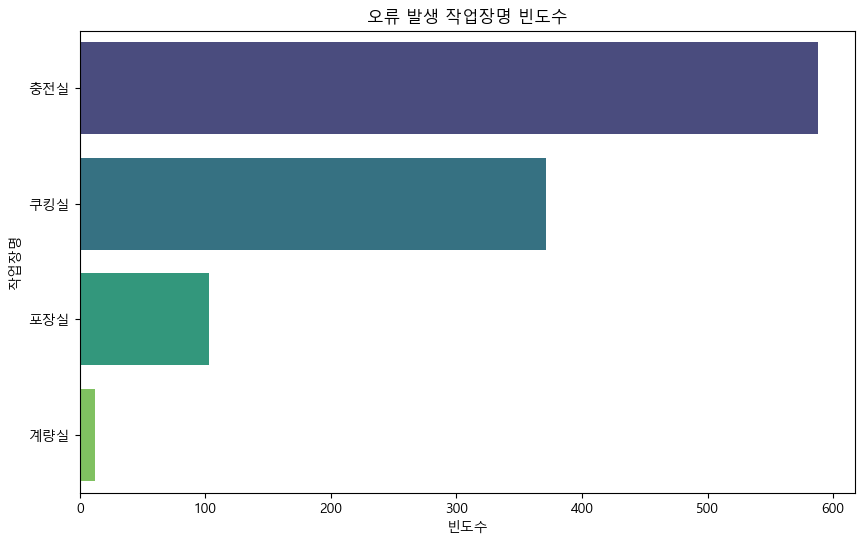

In [4]:
workplace_counts = df1['오류발생작업장명'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.countplot(data=df1, y='오류발생작업장명', order=workplace_counts.index, palette='viridis')
plt.xlabel('빈도수')
plt.ylabel('작업장명')
plt.title('오류 발생 작업장명 빈도수')
plt.show()

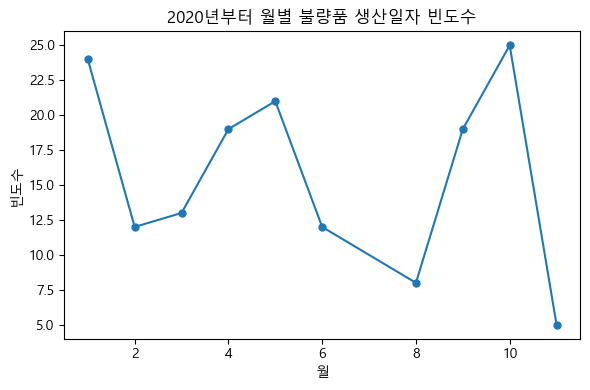

In [5]:
df1['생산일자'] = pd.to_datetime(df1['생산일자'])

# 2020년 이후의 데이터 필터링
df_2020_and_after = df1[df1['생산일자'].dt.year >= 2020]

# 2020년 이후의 월별 빈도수 계산
monthly_counts = df_2020_and_after['생산일자'].dt.month.value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(6, 4))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', markersize=5)
plt.xlabel('월')
plt.ylabel('빈도수')
plt.title('2020년부터 월별 불량품 생산일자 빈도수')
plt.tight_layout()
plt.show()

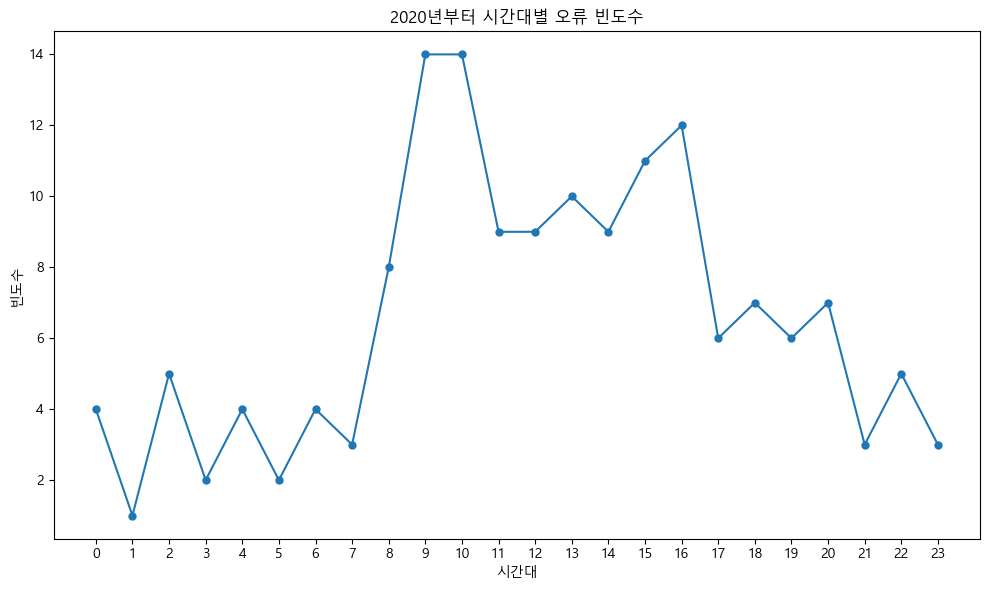

In [6]:
df1['생산일자'] = pd.to_datetime(df1['생산일자'])
df1['발생시간'] = pd.to_datetime(df1['발생시간'])

# 2020년 이후의 데이터 필터링
df_2020_and_after = df1[df1['생산일자'].dt.year >= 2020]

# 시간대별 오류 빈도수 계산
hourly_counts = df_2020_and_after['발생시간'].dt.hour.value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-', markersize=5)
plt.xlabel('시간대')
plt.ylabel('빈도수')
plt.title('2020년부터 시간대별 오류 빈도수')
plt.xticks(range(24))  # x축 레이블 시간대로 설정
plt.tight_layout()  # 그래프 요소 간격 조정
plt.show()

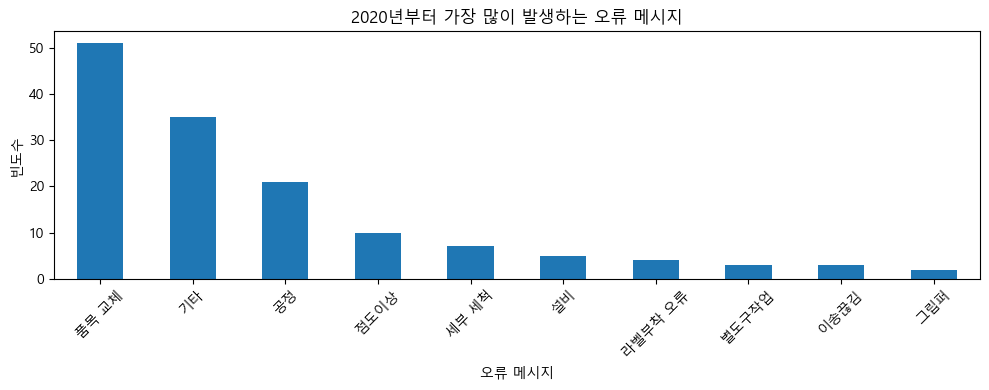

In [7]:
# 2020년 이후의 데이터 필터링
df_2020_and_after = df1[df1['생산일자'].dt.year >= 2020]

# 가장 많이 발생하는 오류 메시지 추출
top_error_messages = df_2020_and_after['Error_Message'].value_counts().head(10)

# 그래프 그리기
plt.figure(figsize=(10, 4))  # 그래프 크기 설정
top_error_messages.plot(kind='bar')
plt.xlabel('오류 메시지')
plt.ylabel('빈도수')
plt.title('2020년부터 가장 많이 발생하는 오류 메시지')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()  # 그래프 요소 간격 조정
plt.show()

In [8]:
cooking_error = pd.merge(df2, df1, on=['품목코드','순번','생산라인코드','생산라인명', '생산일자', '품목명'], how='inner')
cooking_error

 

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat